In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
%matplotlib inline

print("✓ Библиотеки успешно импортированы")

✓ Библиотеки успешно импортированы


In [2]:
def load_or_create_gray(path='C:\\Users\\engfile\\image_processing\\dz2\\sar_1.jpg', size=(256,256)):
    """Загрузка или создание тестового изображения"""
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        return img
    # создаём тестовый градиент, если файла нет
    return np.tile(np.linspace(0,255,size[0],dtype=np.uint8), (size[1],1))

def add_gaussian_noise(image, mean=0, sigma=20):
    """Добавление гауссова шума"""
    noise = np.random.normal(mean, sigma, image.shape)
    noisy = image.astype(np.float32) + noise
    return np.clip(noisy, 0, 255).astype(np.uint8)

def add_constant_noise(image, value=30):
    """Добавление постоянного шума"""
    noisy = image.astype(np.int16) + np.random.randint(-value, value, image.shape)
    return np.clip(noisy, 0, 255).astype(np.uint8)

def mse(a, b):
    """Вычисление MSE"""
    return np.mean((a.astype('float32') - b.astype('float32')) ** 2)

print("✓ Функции загружены")

✓ Функции загружены


=== ЗАГРУЗКА ИСХОДНОГО ИЗОБРАЖЕНИЯ ===


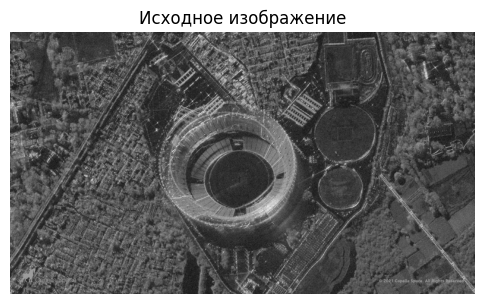

Размер изображения: (675, 1200)
Диапазон интенсивностей: 0 - 255


In [3]:
print("=== ЗАГРУЗКА ИСХОДНОГО ИЗОБРАЖЕНИЯ ===")
img = load_or_create_gray()

plt.figure(figsize=(6, 5))
plt.imshow(img, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')
plt.show()

print(f"Размер изображения: {img.shape}")
print(f"Диапазон интенсивностей: {img.min()} - {img.max()}")

=== ГАУССОВ ШУМ ===


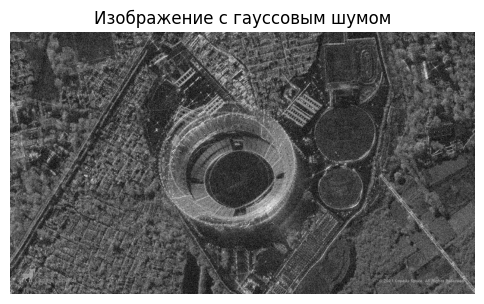

✓ Изображение с гауссовым шумом сохранено


In [4]:
print("=== ГАУССОВ ШУМ ===")
img_gauss = add_gaussian_noise(img)

plt.figure(figsize=(6, 5))
plt.imshow(img_gauss, cmap='gray')
plt.title('Изображение с гауссовым шумом')
plt.axis('off')
plt.show()

cv2.imwrite('noisy_gaussian.jpg', img_gauss)
print("✓ Изображение с гауссовым шумом сохранено")

=== ПОСТОЯННЫЙ ШУМ ===


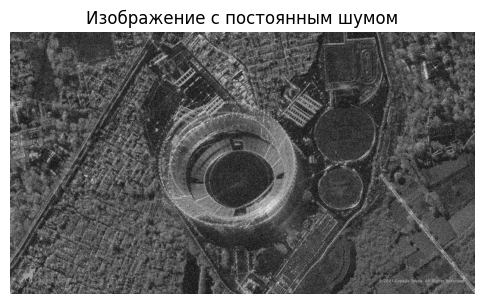

✓ Изображение с постоянным шумом сохранено


In [5]:
print("=== ПОСТОЯННЫЙ ШУМ ===")
img_const = add_constant_noise(img)

plt.figure(figsize=(6, 5))
plt.imshow(img_const, cmap='gray')
plt.title('Изображение с постоянным шумом')
plt.axis('off')
plt.show()

cv2.imwrite('noisy_constant.jpg', img_const)
print("✓ Изображение с постоянным шумом сохранено")

=== ТЕСТИРОВАНИЕ ФИЛЬТРОВ ДЛЯ ГАУССОВА ШУМА ===

--- Медианный фильтр ---


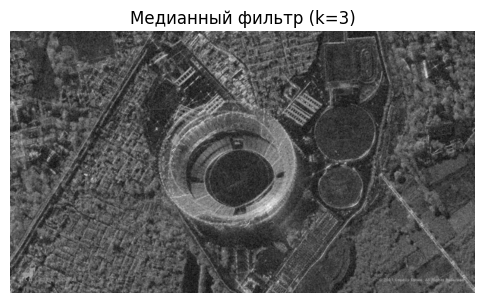

k=3: MSE=170.69, SSIM=0.6859


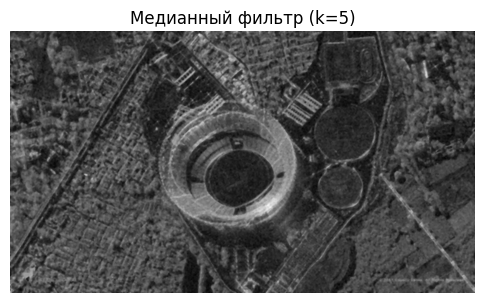

k=5: MSE=224.93, SSIM=0.5811


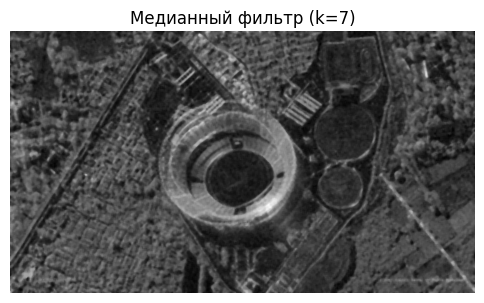

k=7: MSE=277.41, SSIM=0.4928


In [6]:
print("=== ТЕСТИРОВАНИЕ ФИЛЬТРОВ ДЛЯ ГАУССОВА ШУМА ===")

# Медианный фильтр
print("\n--- Медианный фильтр ---")
for k in [3, 5, 7]:
    filtered = cv2.medianBlur(img_gauss, k)
    plt.figure(figsize=(6, 5))
    plt.imshow(filtered, cmap='gray')
    plt.title(f'Медианный фильтр (k={k})')
    plt.axis('off')
    plt.show()
    
    mse_val = mse(img, filtered)
    ssim_val = ssim(img, filtered, data_range=255)
    print(f"k={k}: MSE={mse_val:.2f}, SSIM={ssim_val:.4f}")


--- Гауссов фильтр ---


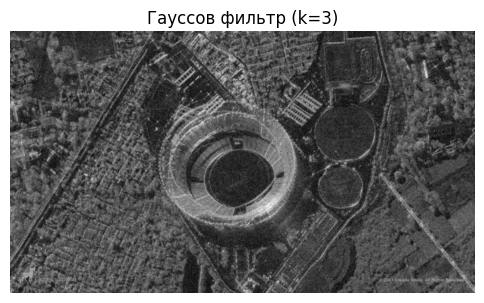

k=3: MSE=119.38, SSIM=0.7702


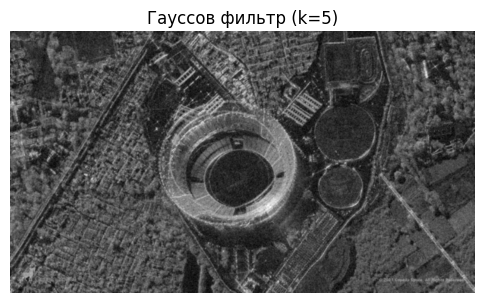

k=5: MSE=139.97, SSIM=0.7338


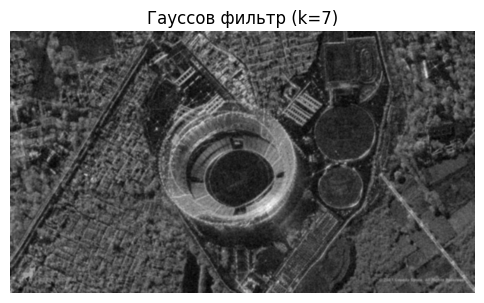

k=7: MSE=179.52, SSIM=0.6626


In [7]:
print("\n--- Гауссов фильтр ---")
for k in [3, 5, 7]:
    filtered = cv2.GaussianBlur(img_gauss, (k, k), 0)
    plt.figure(figsize=(6, 5))
    plt.imshow(filtered, cmap='gray')
    plt.title(f'Гауссов фильтр (k={k})')
    plt.axis('off')
    plt.show()
    
    mse_val = mse(img, filtered)
    ssim_val = ssim(img, filtered, data_range=255)
    print(f"k={k}: MSE={mse_val:.2f}, SSIM={ssim_val:.4f}")


--- Билатеральный фильтр ---


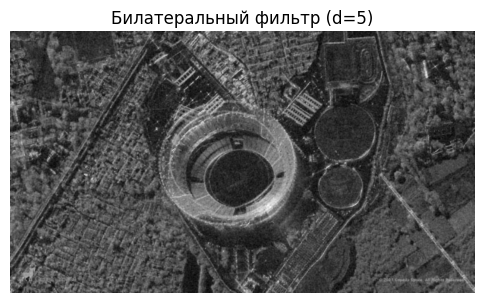

d=5: MSE=137.71, SSIM=0.7274


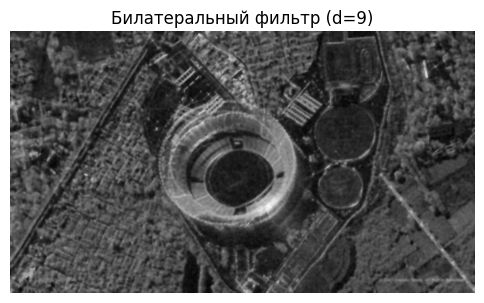

d=9: MSE=199.17, SSIM=0.6087


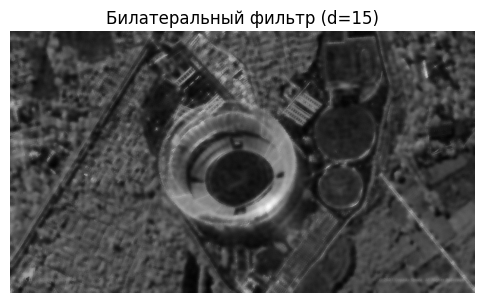

d=15: MSE=272.42, SSIM=0.5078


In [8]:
print("\n--- Билатеральный фильтр ---")
for d in [5, 9, 15]:
    filtered = cv2.bilateralFilter(img_gauss, d, 75, 75)
    plt.figure(figsize=(6, 5))
    plt.imshow(filtered, cmap='gray')
    plt.title(f'Билатеральный фильтр (d={d})')
    plt.axis('off')
    plt.show()
    
    mse_val = mse(img, filtered)
    ssim_val = ssim(img, filtered, data_range=255)
    print(f"d={d}: MSE={mse_val:.2f}, SSIM={ssim_val:.4f}")


--- Фильтр нелокальных средних ---


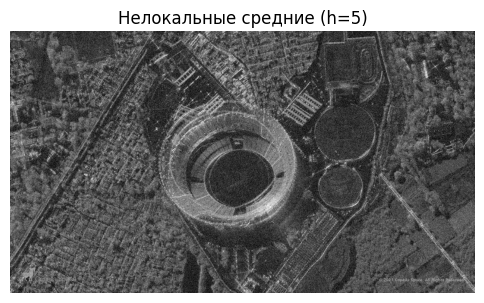

h=5: MSE=395.73, SSIM=0.5741


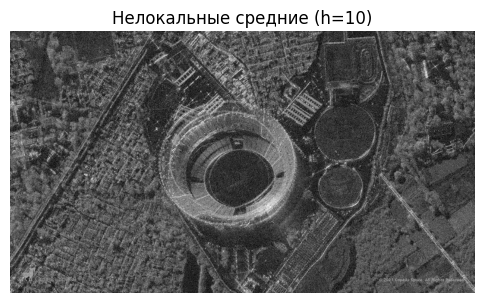

h=10: MSE=386.80, SSIM=0.5785


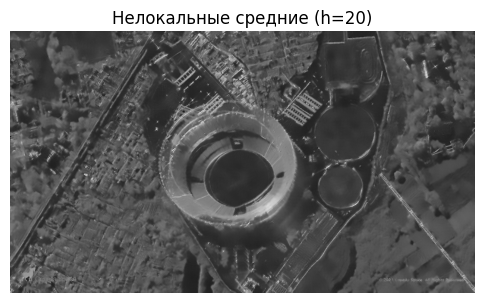

h=20: MSE=155.69, SSIM=0.6547


In [9]:
print("\n--- Фильтр нелокальных средних ---")
for h in [5, 10, 20]:
    filtered = cv2.fastNlMeansDenoising(img_gauss, None, h, 7, 21)
    plt.figure(figsize=(6, 5))
    plt.imshow(filtered, cmap='gray')
    plt.title(f'Нелокальные средние (h={h})')
    plt.axis('off')
    plt.show()
    
    mse_val = mse(img, filtered)
    ssim_val = ssim(img, filtered, data_range=255)
    print(f"h={h}: MSE={mse_val:.2f}, SSIM={ssim_val:.4f}")

=== ТЕСТИРОВАНИЕ ФИЛЬТРОВ ДЛЯ ПОСТОЯННОГО ШУМА ===

--- Медианный фильтр ---


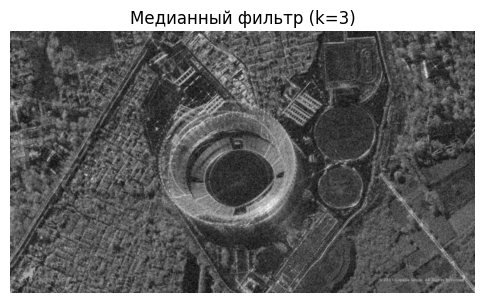

k=3: MSE=171.41, SSIM=0.6794


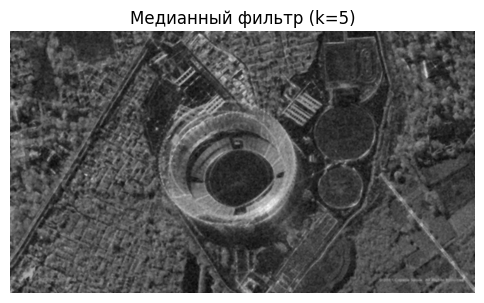

k=5: MSE=226.52, SSIM=0.5760


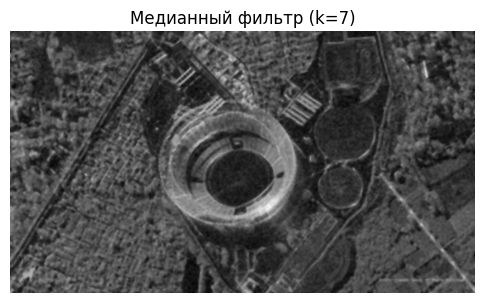

k=7: MSE=279.22, SSIM=0.4885


In [10]:
print("=== ТЕСТИРОВАНИЕ ФИЛЬТРОВ ДЛЯ ПОСТОЯННОГО ШУМА ===")

# Медианный фильтр
print("\n--- Медианный фильтр ---")
for k in [3, 5, 7]:
    filtered = cv2.medianBlur(img_const, k)
    plt.figure(figsize=(6, 5))
    plt.imshow(filtered, cmap='gray')
    plt.title(f'Медианный фильтр (k={k})')
    plt.axis('off')
    plt.show()
    
    mse_val = mse(img, filtered)
    ssim_val = ssim(img, filtered, data_range=255)
    print(f"k={k}: MSE={mse_val:.2f}, SSIM={ssim_val:.4f}")


--- Гауссов фильтр ---


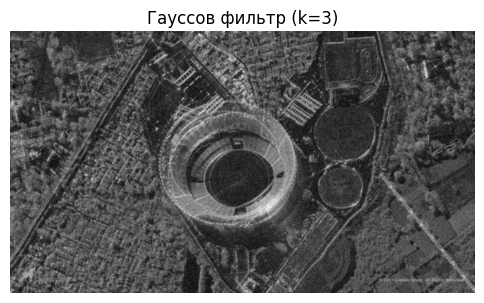

k=3: MSE=106.03, SSIM=0.7924


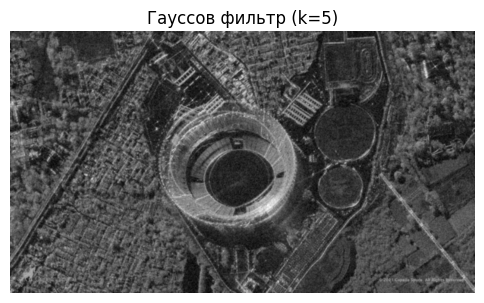

k=5: MSE=132.73, SSIM=0.7464


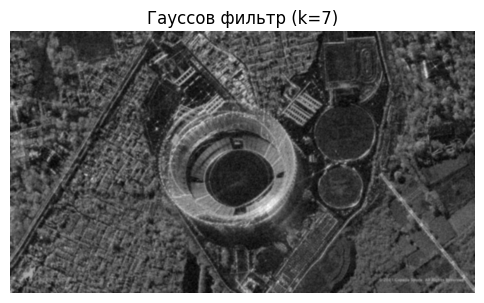

k=7: MSE=175.50, SSIM=0.6691


In [11]:
print("\n--- Гауссов фильтр ---")
for k in [3, 5, 7]:
    filtered = cv2.GaussianBlur(img_const, (k, k), 0)
    plt.figure(figsize=(6, 5))
    plt.imshow(filtered, cmap='gray')
    plt.title(f'Гауссов фильтр (k={k})')
    plt.axis('off')
    plt.show()
    
    mse_val = mse(img, filtered)
    ssim_val = ssim(img, filtered, data_range=255)
    print(f"k={k}: MSE={mse_val:.2f}, SSIM={ssim_val:.4f}")


--- Билатеральный фильтр ---


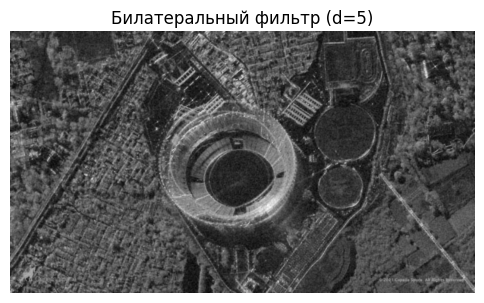

d=5: MSE=131.56, SSIM=0.7361


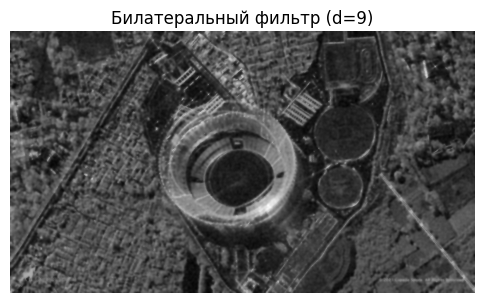

d=9: MSE=199.66, SSIM=0.6038


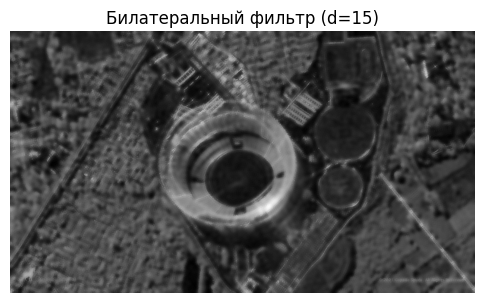

d=15: MSE=275.71, SSIM=0.4980


In [12]:
print("\n--- Билатеральный фильтр ---")
for d in [5, 9, 15]:
    filtered = cv2.bilateralFilter(img_const, d, 75, 75)
    plt.figure(figsize=(6, 5))
    plt.imshow(filtered, cmap='gray')
    plt.title(f'Билатеральный фильтр (d={d})')
    plt.axis('off')
    plt.show()
    
    mse_val = mse(img, filtered)
    ssim_val = ssim(img, filtered, data_range=255)
    print(f"d={d}: MSE={mse_val:.2f}, SSIM={ssim_val:.4f}")


--- Фильтр нелокальных средних ---


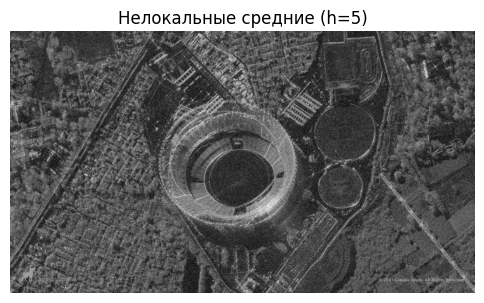

h=5: MSE=300.05, SSIM=0.6294


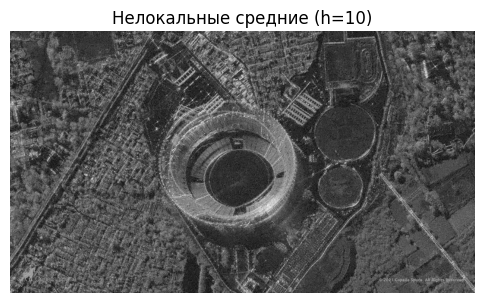

h=10: MSE=270.58, SSIM=0.6510


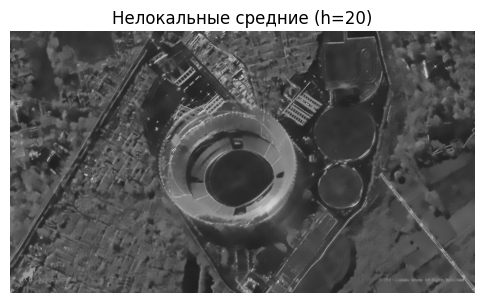

h=20: MSE=158.79, SSIM=0.6374


In [13]:
print("\n--- Фильтр нелокальных средних ---")
for h in [5, 10, 20]:
    filtered = cv2.fastNlMeansDenoising(img_const, None, h, 7, 21)
    plt.figure(figsize=(6, 5))
    plt.imshow(filtered, cmap='gray')
    plt.title(f'Нелокальные средние (h={h})')
    plt.axis('off')
    plt.show()
    
    mse_val = mse(img, filtered)
    ssim_val = ssim(img, filtered, data_range=255)
    print(f"h={h}: MSE={mse_val:.2f}, SSIM={ssim_val:.4f}")

=== СРАВНЕНИЕ ЛУЧШИХ ФИЛЬТРОВ ===


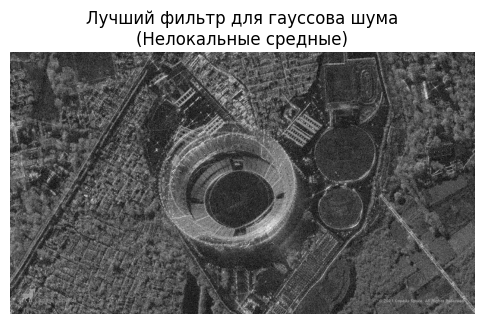

Гауссов шум - лучший фильтр:
MSE: 386.80, SSIM: 0.5785


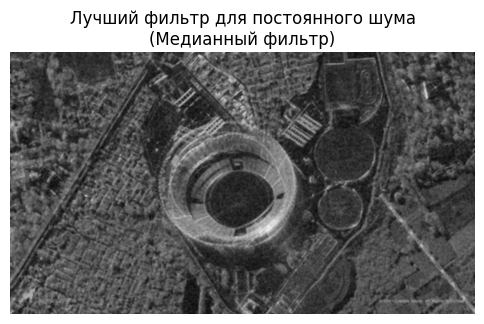


Постоянный шум - лучший фильтр:
MSE: 226.52, SSIM: 0.5760


In [14]:
print("=== СРАВНЕНИЕ ЛУЧШИХ ФИЛЬТРОВ ===")

# Найдем лучшие фильтры для каждого типа шума
best_gauss = cv2.fastNlMeansDenoising(img_gauss, None, 10, 7, 21)
best_const = cv2.medianBlur(img_const, 5)

# Гауссов шум - лучший результат
plt.figure(figsize=(6, 5))
plt.imshow(best_gauss, cmap='gray')
plt.title('Лучший фильтр для гауссова шума\n(Нелокальные средные)')
plt.axis('off')
plt.show()

mse_gauss = mse(img, best_gauss)
ssim_gauss = ssim(img, best_gauss, data_range=255)
print(f"Гауссов шум - лучший фильтр:")
print(f"MSE: {mse_gauss:.2f}, SSIM: {ssim_gauss:.4f}")

# Постоянный шум - лучший результат
plt.figure(figsize=(6, 5))
plt.imshow(best_const, cmap='gray')
plt.title('Лучший фильтр для постоянного шума\n(Медианный фильтр)')
plt.axis('off')
plt.show()

mse_const = mse(img, best_const)
ssim_const = ssim(img, best_const, data_range=255)
print(f"\nПостоянный шум - лучший фильтр:")
print(f"MSE: {mse_const:.2f}, SSIM: {ssim_const:.4f}")

In [ ]:
print("=== ИТОГОВЫЕ РЕЗУЛЬТАТЫ ===")
print("\nДля гауссова шума лучше всего показал себя фильтр НЕЛОКАЛЬНЫХ СРЕДНИХ")
print("Для постоянного шума лучше всего показал себя МЕДИАННЫЙ ФИЛЬТР")
print(f"\nМетрики качества:")
print(f"Гауссов шум (нелокальные средние): MSE={mse_gauss:.2f}, SSIM={ssim_gauss:.4f}")
print(f"Постоянный шум (медианный фильтр): MSE={mse_const:.2f}, SSIM={ssim_const:.4f}")

=== ИТОГОВЫЕ РЕЗУЛЬТАТЫ ===

Для гауссова шума лучше всего показал себя фильтр НЕЛОКАЛЬНЫХ СРЕДНИХ
Для постоянного шума лучше всего показал себя МЕДИАННЫЙ ФИЛЬТР

Метрики качества:


NameError: name 'mse_gauss' is not defined